In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import pathlib
import matplotlib.pyplot as plt
import cv2


In [3]:
train_path="./train"
test_path="./test"

In [4]:
data_dir=pathlib.Path(train_path)
data_dir

WindowsPath('train')

In [5]:
ball_names=list(os.listdir(train_path))
ball_names[:5]

['baseball', 'basketball', 'beachballs', 'billiard ball', 'bowling ball']

In [6]:
ball_lable={
    name:index for index,name in enumerate(ball_names)
}

In [7]:
train_dict={
    name:list(data_dir.glob(f'{name}/*')) for name in ball_names
}
train_dict['meat ball'][0]

WindowsPath('train/meat ball/001.jpg')

In [8]:
x=[]
y=[]
for name,images in train_dict.items():
    for image_path in images:
        img=cv2.imread(str(image_path))
        img=cv2.resize(img,(244,244))
        x.append(img)
        y.append(ball_lable[name])

In [9]:
x_train=np.array(x)
y_train=np.array(y)


In [10]:
x_train=x_train/255

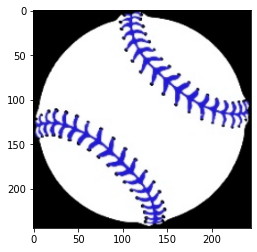

In [11]:
plt.imshow(x_train[0])

In [12]:
x_train[0].shape

(244, 244, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras


In [14]:
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.1,input_shape=(244,244,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomFlip('horizontal')
])

In [15]:
model=keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(len(ball_names),activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
90/90 [==============================] - 86s 937ms/step - loss: 2.7606 - sparse_categorical_accuracy: 0.2231
Epoch 2/30
90/90 [==============================] - 84s 933ms/step - loss: 2.0067 - sparse_categorical_accuracy: 0.4392
Epoch 3/30
90/90 [==============================] - 83s 917ms/step - loss: 1.6334 - sparse_categorical_accuracy: 0.5402
Epoch 4/30
90/90 [==============================] - 83s 918ms/step - loss: 1.4177 - sparse_categorical_accuracy: 0.5857
Epoch 5/30
90/90 [==============================] - 83s 923ms/step - loss: 1.2518 - sparse_categorical_accuracy: 0.6245
Epoch 6/30
90/90 [==============================] - 84s 929ms/step - loss: 1.0846 - sparse_categorical_accuracy: 0.6783
Epoch 7/30
90/90 [==============================] - 83s 922ms/step - loss: 1.0265 - sparse_categorical_accuracy: 0.6829
Epoch 8/30
90/90 [==============================] - 83s 917ms/step - loss: 0.8842 - sparse_categorical_accuracy: 0.7252
Epoch 9/30
90/90 [======================

In [16]:
data_dir=pathlib.Path(test_path)
data_dir

WindowsPath('test')

In [17]:
test_dict={
    name:list(data_dir.glob(f'{name}/*')) for name in ball_names
}
test_dict['meat ball'][0]

WindowsPath('test/meat ball/1.jpg')

In [18]:
x=[]
y=[]
for name,images in train_dict.items():
    for image_path in images:
        img=cv2.imread(str(image_path))
        img=cv2.resize(img,(244,244))
        x.append(img)
        y.append(ball_lable[name])

In [19]:
x_test=np.array(x)
y_test=np.array(y)


In [20]:
x_test=x_test/255

In [21]:
model.evaluate(x_test,y_test)

90/90 [==============================] - 13s 136ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9556


[0.14440008997917175, 0.9555944204330444]

In [27]:
import pickle 
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


In [28]:
new_model=tf.keras.models.load_model('my_model')
new_model.evaluate(x_test,y_test)

90/90 [==============================] - 13s 135ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9556


[0.14440008997917175, 0.9555944204330444]